In [1]:
#Importing some initial essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data file
df=pd.read_csv('Data file.csv')

In [3]:
#Getting a glimpse of the data
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#Looking at the data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
#Checking for NULL values
df.isnull().sum()
#No NULL values are present

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Columns to be dropped after going through data dictionary:
1. unnamed: Serial Number
2. msisdn: Mobile number
3. pcircle: All entries are the same
4. pdate: Date

In [6]:
#Dropping the aforementioned columns
df.drop(columns=['msisdn','pcircle','pdate'],axis=1, inplace=True)
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [7]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


## Exploratory Data Analysis

In [8]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [9]:
# Let's study 'Daily amount spent from main account, averaged over last 90 days'
df['daily_decr90'].describe()

count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

From the above description, it is evident that 75% of the people spend less than 7802 while the maximum spent is whopping 265926 per day. This is too much for a single person to spend.

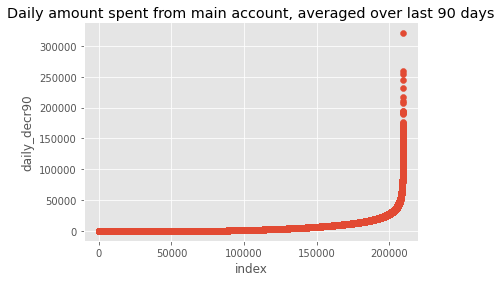

In [10]:
#Let's have a look at it graphically
plt.scatter(range(df.shape[0]), np.sort(df['daily_decr90'].values))
plt.xlabel('index')
plt.ylabel('daily_decr90')
plt.title("Daily amount spent from main account, averaged over last 90 days")
sns.despine() #To remove the spines from the graph
#Looks like there are a lot of outliers present here.

Now, let's divide our dataset into different brackets of spenders based upon how much they have spent. We will have 4 categories here:
1. Spent 0 or less: Nothing spent
2. Spent between 0 and 26592(1% of max): Low Spenders
3. Spent between 26592 and 159555(60% of max): Medium Spenders
4. Spent more than 159555: High Spenders

In [11]:
#Division of the data
f = [df]
for column in f:
    column.loc[column["daily_decr90"] <= 0,  'spenders'] = 'Nothing Spent'
    column.loc[(column["daily_decr90"] > 0) & (column["daily_decr90"] <= 32063), 'spenders'] = 'Low Spenders'
    column.loc[(column["daily_decr90"] > 32063) & (column["daily_decr90"] <= 192378), 'spenders'] = 'Medium Spenders'
    column.loc[(column["daily_decr90"] > 192378), 'spenders'] = 'High Spenders'

In [12]:
#Counting the spenders
spender_count = pd.crosstab(df['label'],df['spenders']).apply(lambda x: x/x.sum() * 100)
spender_count = spender_count.transpose()

In [13]:
spn = pd.DataFrame(df['spenders'].value_counts())
spn['% Subscription'] = spender_count[1]
spn.drop('spenders',axis = 1,inplace = True)

spn['spend'] = [1,2,0,3]
spn = spn.sort_values('spend',ascending = True)

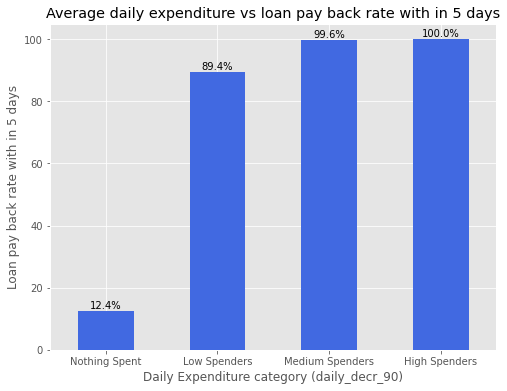

In [14]:
plot_spend = spn['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

plt.title('Average daily expenditure vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Daily Expenditure category (daily_decr_90)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_spend.patches,
                      spn['% Subscription'].round(1).astype(str)):
    plot_spend.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above plot shows that if you spend more daily, its likely that you will payback the amount on time.

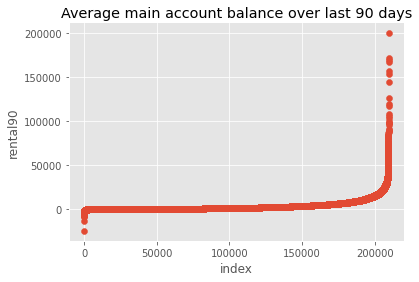

In [15]:
#let's analyse Rental_90 now
plt.scatter(range(df.shape[0]), np.sort(df['rental90'].values))
plt.xlabel('index')
plt.ylabel('rental90')
plt.title("Average main account balance over last 90 days")
sns.despine()

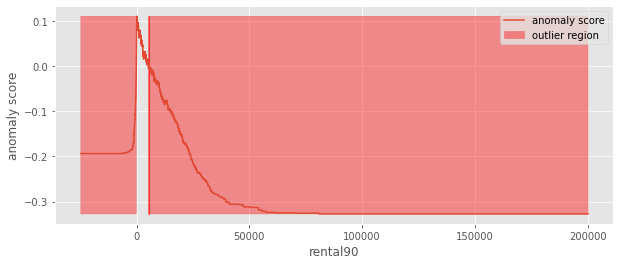

In [16]:
#Let's have a look at how much region is surrounded by outliers in rental30
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['rental90'].values.reshape(-1, 1))
xx = np.linspace(df['rental90'].min(), df['rental90'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('rental90')
plt.show();


From the above plot, it is evident that majority of our data lies in a very small region and rest of it lies in the region of outliers. This can impact our model negatively and the model can gravitate towards outliers which will impact our accuracy score.

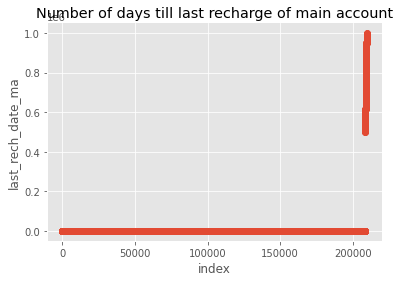

In [17]:
plt.scatter(range(df.shape[0]), np.sort(df['last_rech_date_ma'].values))
plt.xlabel('index')
plt.ylabel('last_rech_date_ma')
plt.title("Number of days till last recharge of main account")
sns.despine()

From the above graph, we can see that there are a few anomalies in the dataset. These are the number of days since last recharge. Some of the days are even more than 400000, which means more than 1000 years, when the mobile phones were not even invented. Hence a lot of data is incorrect here and these values will be removed while treating the outliers.

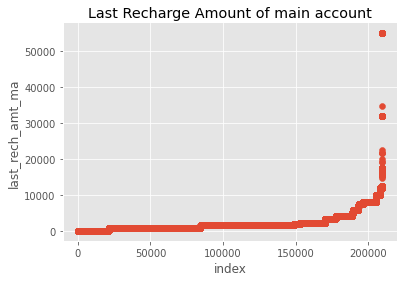

In [18]:
#Analysing the last rcharge amount of main account
plt.scatter(range(df.shape[0]), np.sort(df['last_rech_amt_ma'].values))
plt.xlabel('index')
plt.ylabel('last_rech_amt_ma')
plt.title("Last Recharge Amount of main account")
sns.despine()

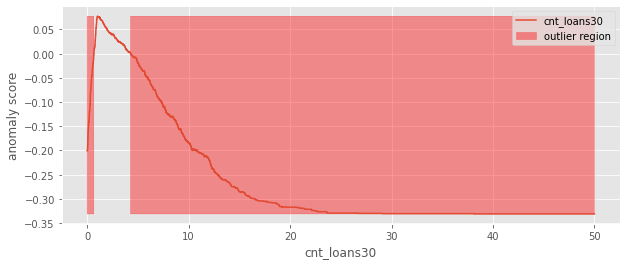

In [19]:
#Let's have a look at how much region is surrounded by outliers in cnt_loans30

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['cnt_loans30'].values.reshape(-1, 1))
xx = np.linspace(df['cnt_loans30'].min(), df['cnt_loans30'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='cnt_loans30')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('cnt_loans30')
plt.show();


A significant amount of our data belongs to the outlier region. Most of the users have taken only 1 or 2 loans in the last 30 days and rest of the occurances are fairly less, which makes their probability of occurance significantly low. Let's plot the number of loans taken in the last 30 days on a graph.

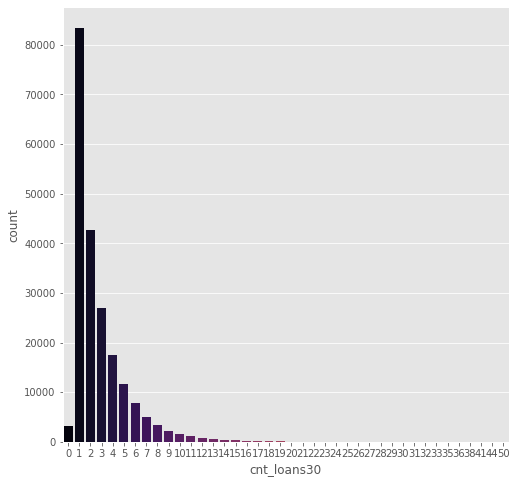

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64


In [20]:
sns.countplot(df['cnt_loans30'],palette = 'inferno')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()
print(df['cnt_loans30'].value_counts())

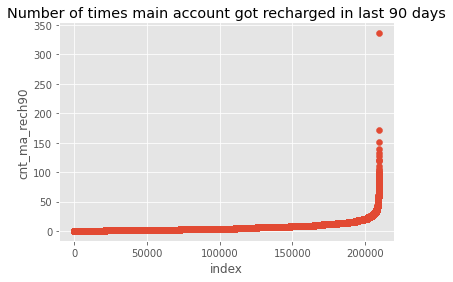

In [21]:
#Analysing the last rcharge amount of main account
plt.scatter(range(df.shape[0]), np.sort(df['cnt_ma_rech90'].values))
plt.xlabel('index')
plt.ylabel('cnt_ma_rech90')
plt.title("Number of times main account got recharged in last 90 days")
sns.despine()

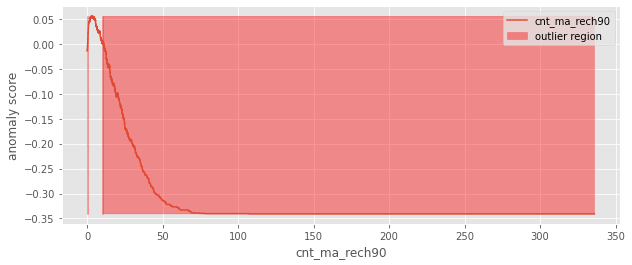

In [22]:
#Let's have a look at how much region is surrounded by outliers in cnt_ma_rech90

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['cnt_ma_rech90'].values.reshape(-1, 1))
xx = np.linspace(df['cnt_ma_rech90'].min(), df['cnt_ma_rech90'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='cnt_ma_rech90')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('cnt_ma_rech90')
plt.show();

Here also, majority of the values belong to the area which depicts that number of recharges in the last 90 days which are more than ~8 will be treated as outliers

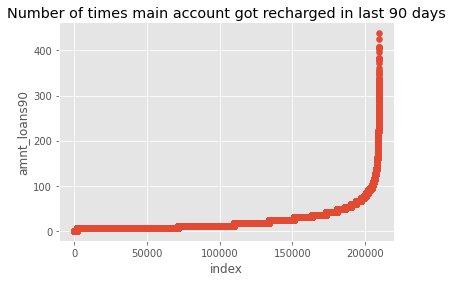

In [23]:
#Analysing the total amount of loans taken by user in last 90 days
plt.scatter(range(df.shape[0]), np.sort(df['amnt_loans90'].values))
plt.xlabel('index')
plt.ylabel('amnt_loans90')
plt.title("Number of times main account got recharged in last 90 days")
sns.despine()

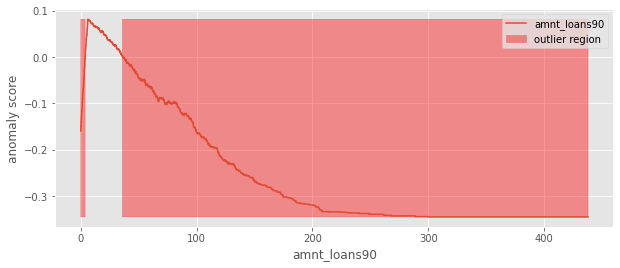

In [24]:
#Let's have a look at how much region is surrounded by outliers in amnt_loans90

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['amnt_loans90'].values.reshape(-1, 1))
xx = np.linspace(df['amnt_loans90'].min(), df['amnt_loans90'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='amnt_loans90')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('amnt_loans90')
plt.show();

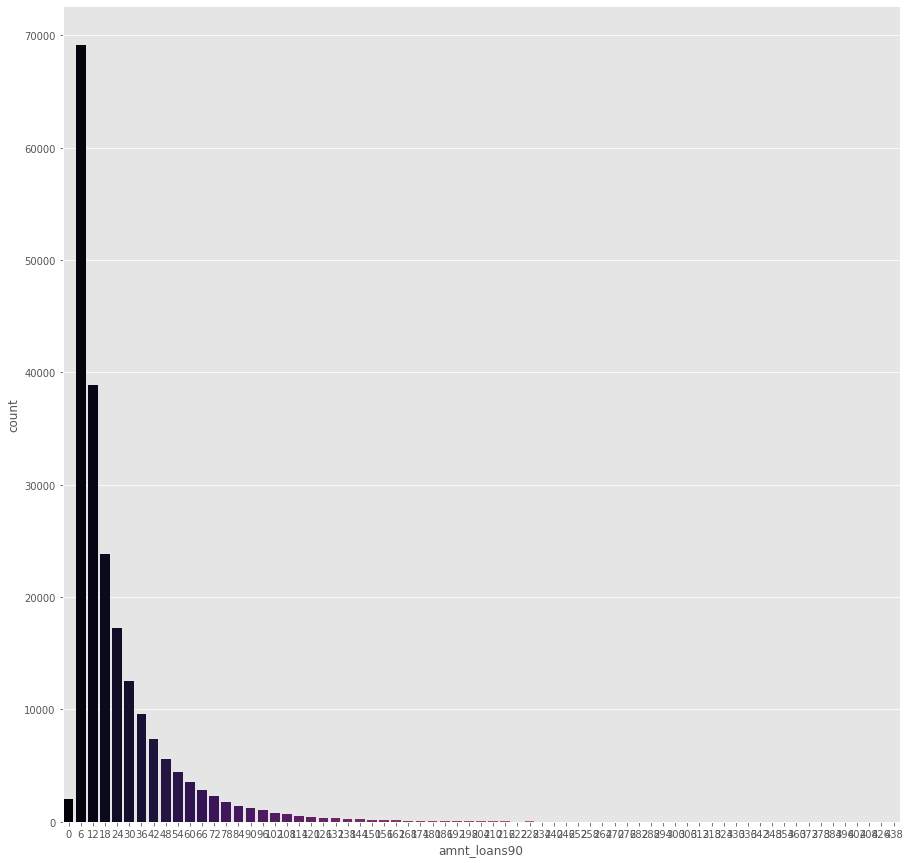

6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
426        1
396        1
438        1
342        1
Name: amnt_loans90, Length: 69, dtype: int64


In [25]:
sns.countplot(df['amnt_loans90'],palette = 'inferno')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()
print(df['amnt_loans90'].value_counts())

label                      AxesSubplot(0.125,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr30            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
daily_decr90               AxesSubplot(0.125,0.763028;0.227941x0.053169)
rental30                AxesSubplot(0.398529,0.763028;0.227941x0.053169)
rental90                AxesSubplot(0.672059,0.763028;0.227941x0.053169)
last_rech_date_ma          AxesSubplot(0.125,0.699225;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.398529,0.699225;0.227941x0.053169)
last_rech_amt_ma        AxesSubplot(0.672059,0.699225;0.227941x0.053169)
cnt_ma_rech30              AxesSubplot(0.125,0.635423;0.227941x0.053169)
fr_ma_rech30            AxesSubplot(0.398529,0.635423;0.227941x0.053169)
sumamnt_ma_rech30       AxesSubplot(0.672059,0.635423;0.227941x0.053169)
medianamnt_ma_rech30        AxesSubplot(0.125,0.57162;0.227941x0.053169)
medianmarechprebal30     AxesSubplot(0.398529,0.571

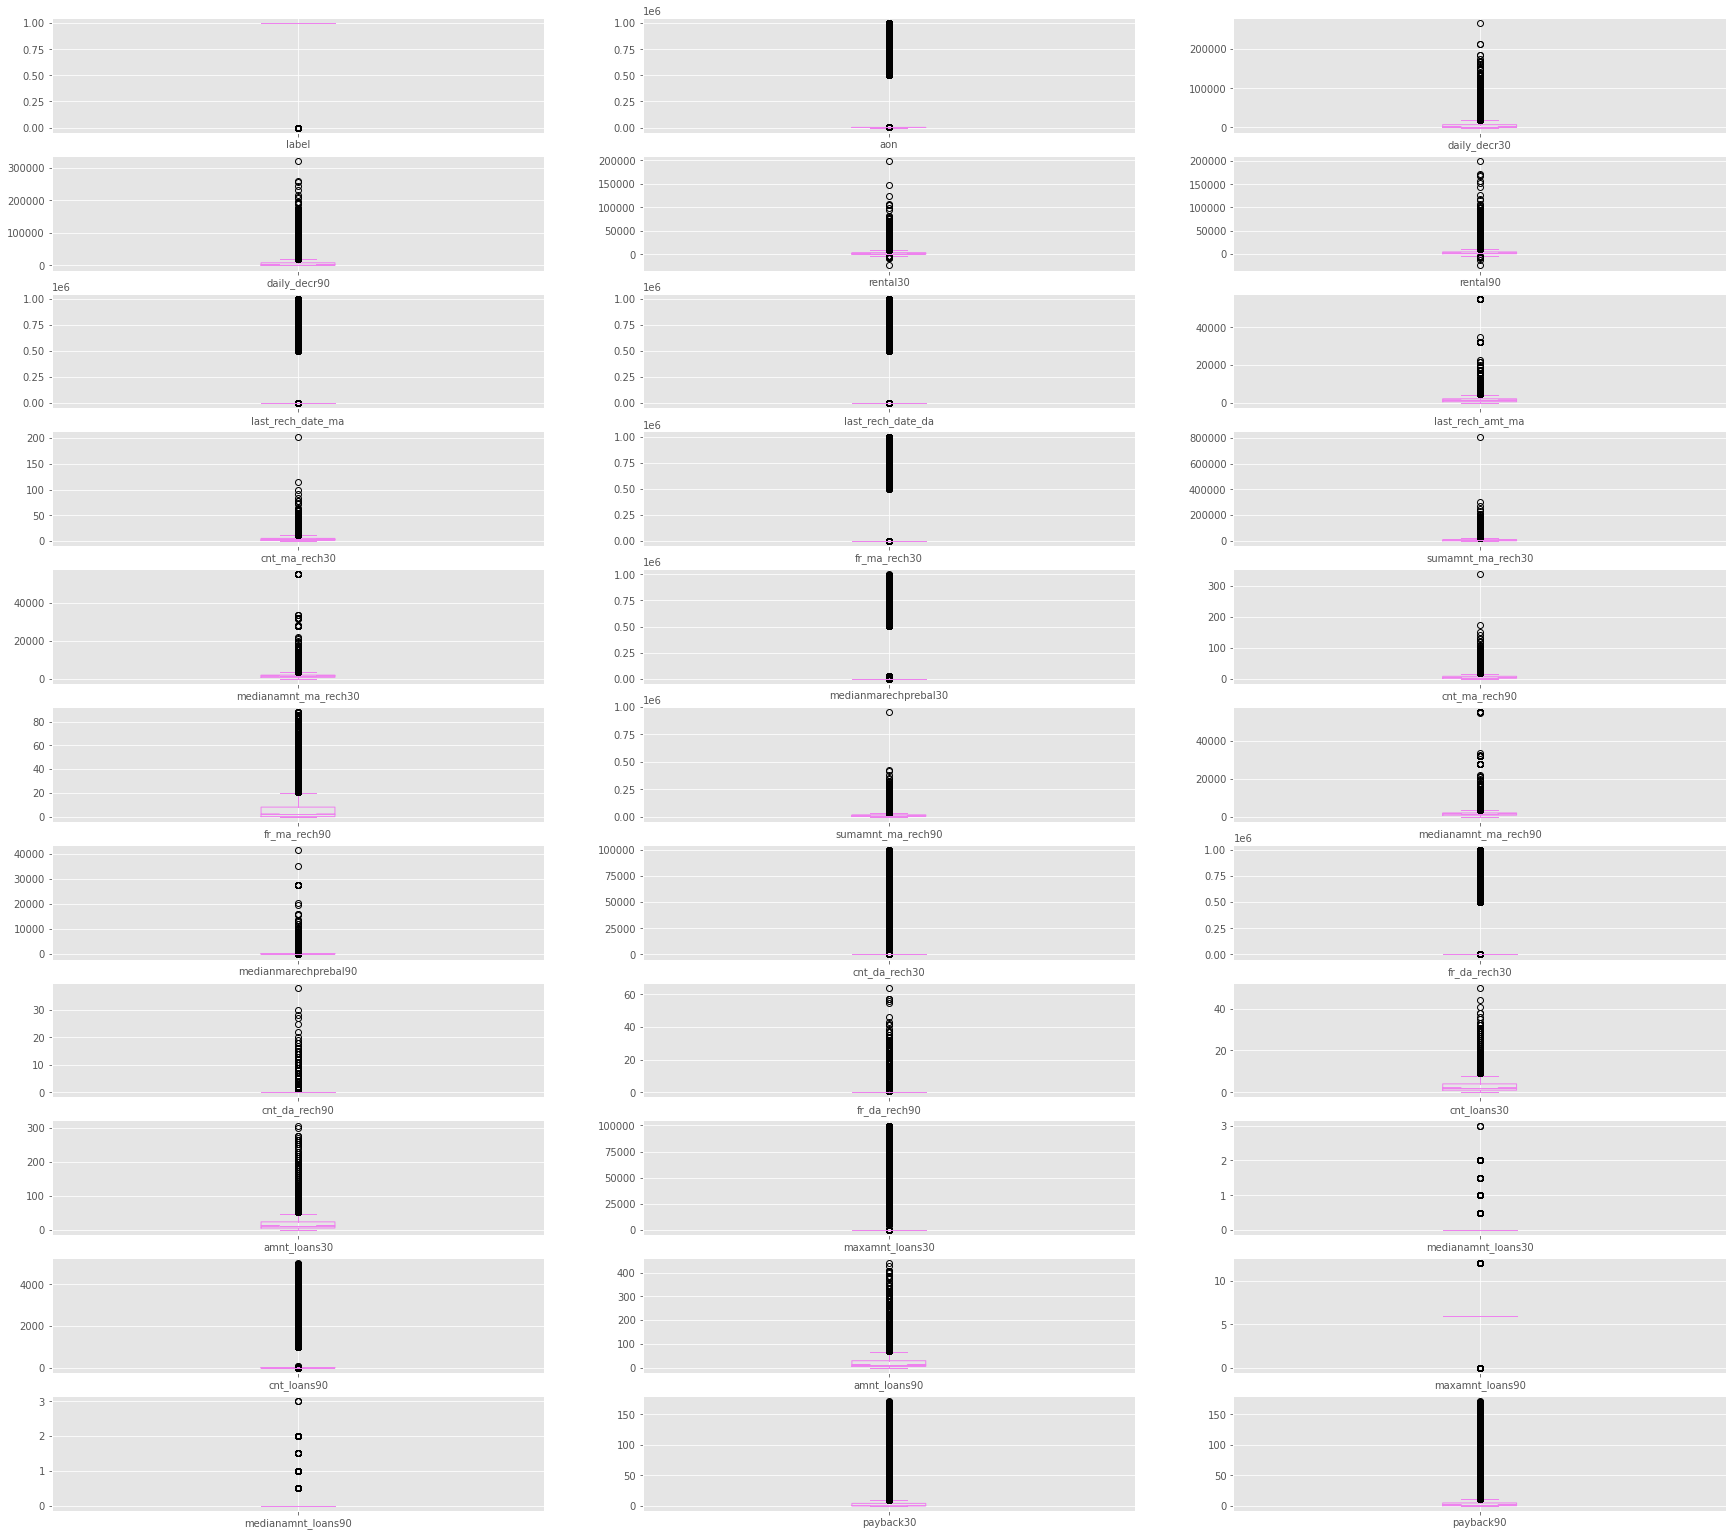

In [26]:
# Let's plot the box plots of all the features to have an overall idea of outlier presence
df.plot(kind='box', subplots=True, layout=(12,3),figsize=(30,30), grid=True, notch=True, color='violet',legend=True)

The above plot shows that almost all the variables are having outliers present

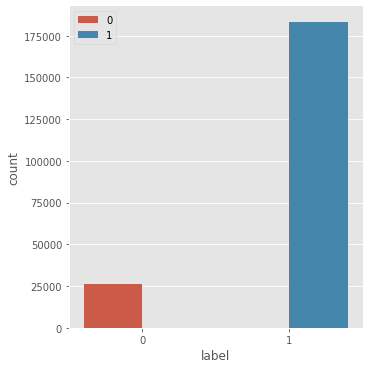

In [27]:
#Let's check the count of each class in the target variable

sns.catplot(x='label',data=df, kind ='count',hue='label')
plt.legend()

Here, the occurances of failure is much less, indicating that there is imbalance in the dataset

In [28]:
#Correlation Check
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


In [29]:
#Now, let's check the correlation of our target variable with other features

df.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

Here, we can see that a few similar features have similar correlation. These are the features which are differently columned in the dataset on the basis of number of days, i.e. 60 and 90.
To prevent multicollinearity, we need to drop the similar features in our dataset.

In [30]:
df.drop(columns=(["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"]), axis=1, inplace=True)

In [31]:
df.shape

(209593, 24)

After dropping the columns, we are left with 24 columns in our dataset

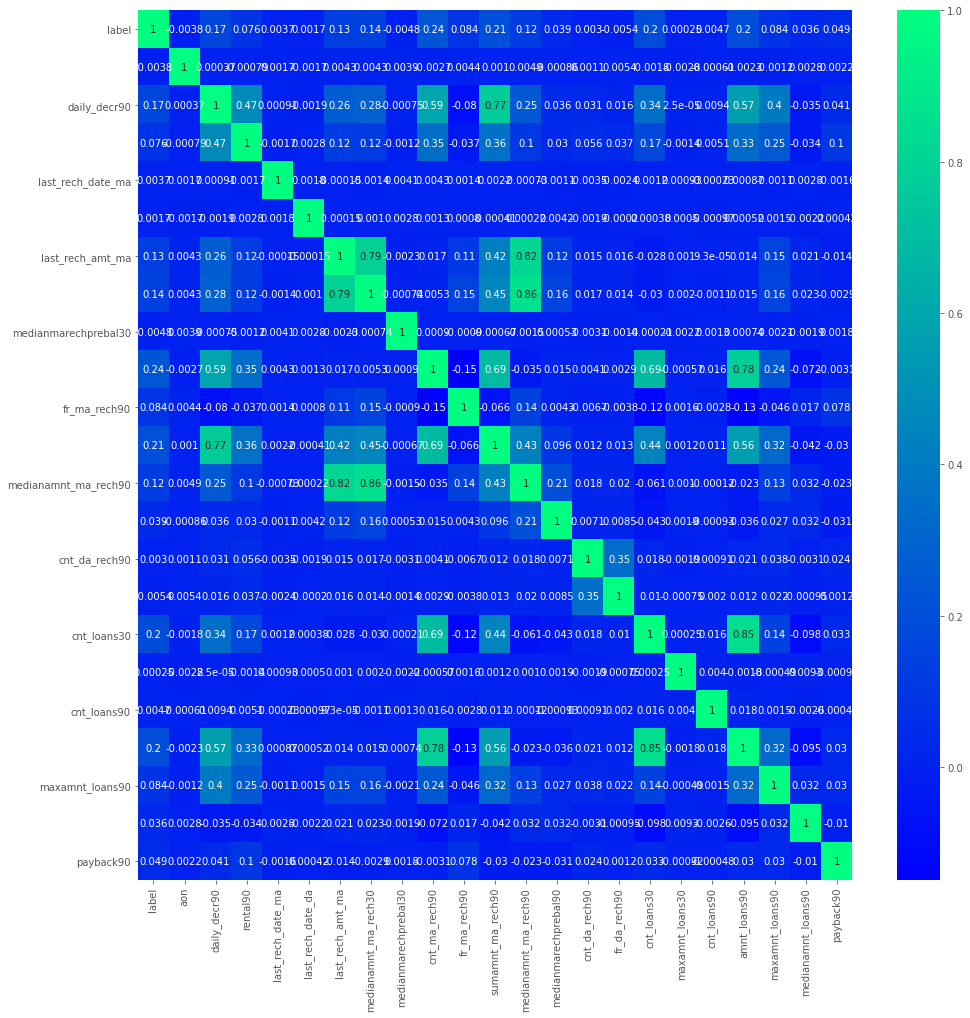

In [32]:
sns.heatmap(df.corr(), annot=True, cmap='winter')
fig = plt.gcf()
fig.set_size_inches(16,16)

## Data Preprocessing

#### Removal of Outliers
The entire dataset is full of outliers. If we build a model without treating them, the entire model will gravitate towards them and the accuracy score will be impacted.
Given the cost of our data, we cannot really drop the entire rows filled with outliers because that will result in a data loss.
The best way can be to impute the outliers is with median values of the columns. As we have a lot of samples, there will be multiple occurances of various values and hence, median will be our preferred method of imputation. 
Even if we impute the datta with mean, the data will not be normally distributed. We need to apply cube root to the data as well to achieve a normal distribution.


In [33]:
df.drop(columns=['spenders'], axis=1, inplace=True)

In [34]:
from scipy.stats import zscore
columns=['aon', 'daily_decr90', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback90']
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[i]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>3 or df[columns[i]][j]<-3:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
    df[columns[i]]=np.cbrt((df[columns[i]]))

In [35]:
df.isnull().sum()

label                   0
aon                     0
daily_decr90            0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
dtype: int64

In [36]:
# Split the data into X and y
X = df.drop("label", axis=1)

Y = df["label"]

In [37]:
#Checking the shape of the dataset
print('X:\t',X.shape,'\nY:\t', Y.shape)

X:	 (209593, 22) 
Y:	 (209593,)


In [39]:
# using SMOTETomek to balance the dataset
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x,y=smk.fit_sample(X,Y)
x.shape, y.shape

((360736, 22), (360736,))

In [40]:
#Retrieving the dataframe from the array
X=pd.DataFrame(x,columns=X.columns)

In [41]:
X.head()

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,-0.469628,-0.651355,-0.823561,-0.411415,-0.411243,-0.605175,-0.509453,-0.414441,-0.843391,1.018021,...,-0.611744,-0.470831,-0.363546,-0.667281,-0.398504,-0.418872,-0.760562,-0.693970,-0.612332,1.337767
1,-0.460673,0.820996,0.330255,-0.410757,-0.411243,1.162295,1.242698,-0.412508,-0.904066,-0.849443,...,-0.437818,-0.470831,-0.363546,-0.883050,-0.395515,-0.427158,-0.760562,1.360402,-0.612332,-0.748431
2,-0.464317,-0.754218,-0.764987,-0.411379,-0.411243,-0.605175,-0.509453,-0.412316,-0.904066,-0.849443,...,-0.411386,-0.470831,-0.363546,-0.883050,-0.398504,-0.427158,-0.873562,-0.693970,-0.612332,-0.748431
3,-0.470246,-0.821858,-0.832051,-0.409986,-0.411243,-0.778238,-0.956609,-0.414710,-0.904066,-0.849443,...,-0.623576,-0.470831,-0.363546,-0.667281,-0.398504,-0.418872,-0.760562,-0.693970,-0.612332,-0.748431
4,-0.455745,-0.815968,-0.744840,-0.411342,-0.411243,0.468983,0.621103,-0.413667,0.616383,-0.768610,...,-0.536533,-0.470831,-0.363546,1.184100,-0.398504,-0.371449,0.885112,-0.693970,-0.612332,-0.577773


## Machine learning

In [43]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV


# Importing model performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc


# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Function to find best Random State and then calculate max accuracy score for that state

x=X
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Logistic Regression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  51 is: 0.7640683040416921


Learning Score :  0.7592796651281412
Accuracy Score :  0.7640683040416921
Cross Val Score :  0.7603205813516255
log_loss :  8.148864140060201
roc auc score :  0.764068304041692


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78     36074
           1       0.80      0.71      0.75     36074

    accuracy                           0.76     72148
   macro avg       0.77      0.76      0.76     72148
weighted avg       0.77      0.76      0.76     72148



Confusion Matrix:
 [[29573  6501]
 [10521 25553]]





*************************** GaussianNB *****************************


GaussianNB()


Max Accuracy Score corresponding to Random State  73 is: 0.7291816820979099


Learning Score :  0.7253454752103344
Accuracy Score :  0.72918168209

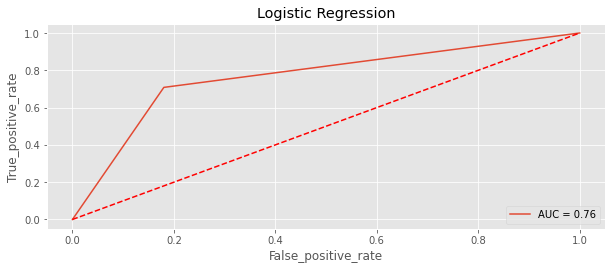

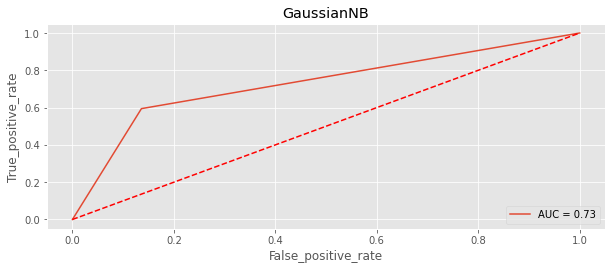

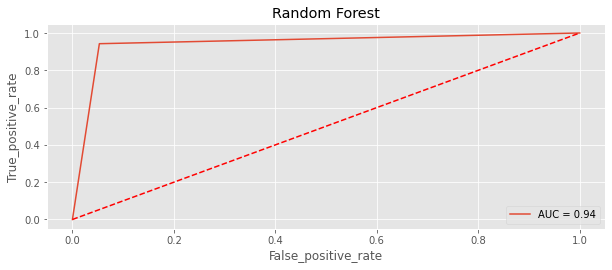

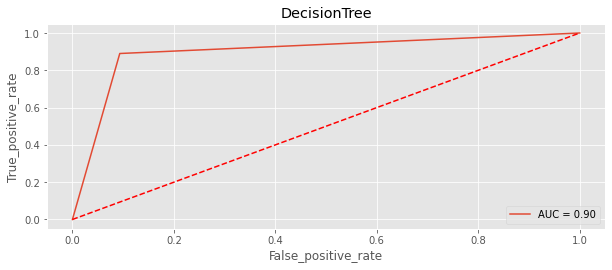

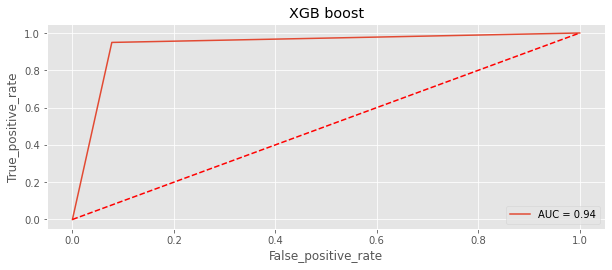

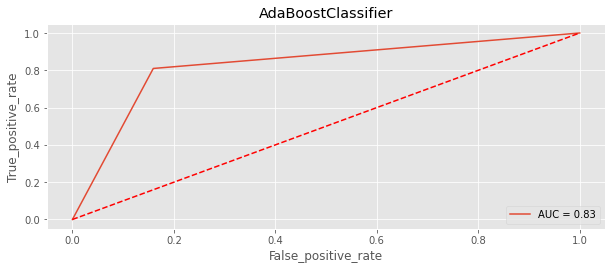

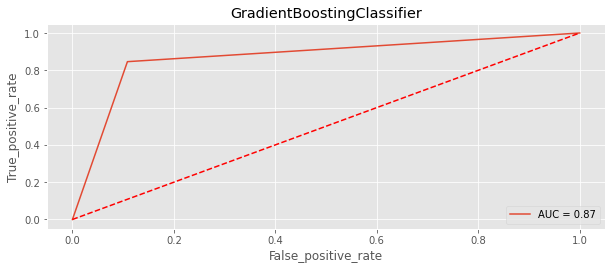

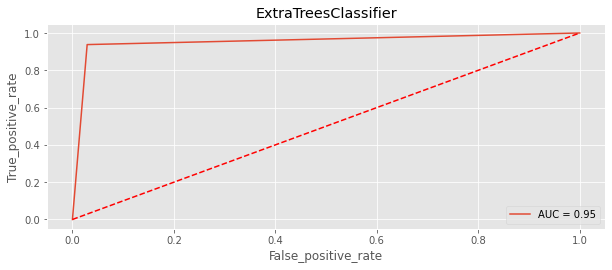

In [45]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("GaussianNB",GaussianNB()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier())) 
models.append(("XGB boost",XGBClassifier()))
models.append(("AdaBoostClassifier",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))  
models.append(("ExtraTreesClassifier",ExtraTreesClassifier()))



#Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score 
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
logLoss = []

# For Loop to calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
# Calculation of best random state and max accuracy score using the previously made function
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#Learning Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
# Cross_val_score
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
#log_loss  
    log_loss = metrics.log_loss(y_true = y_test, y_pred = y_pred)
    print('log_loss : ', log_loss)
    logLoss.append(log_loss)
#AUC-ROC score 
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [46]:
#Creating a dataframe with increasing order of accuracy scores
df2=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross_Val_Score':cvs,
                     'AUC_ROC Score':rocscore,'log_loss':logLoss}) 
df2.sort_values(by = 'Accuracy Score') 


,Model,Learning Score,Accuracy Score,Cross_Val_Score,AUC_ROC Score,log_loss
1,GaussianNB,72.534548,72.918168,72.584107,72.918168,9.353788
0,Logistic Regression,75.927967,76.406830,76.032058,76.406830,8.148864
5,AdaBoostClassifier,82.356162,82.522038,81.904780,82.522038,6.036738
6,GradientBoostingClassifier,86.829667,86.892222,86.403923,86.892222,4.527310
3,DecisionTree,99.975744,89.834784,89.632604,89.834784,3.510979
4,XGB boost,93.806395,93.589566,92.991308,93.589566,2.214117
2,Random Forest,99.948023,94.475245,94.500155,94.475245,1.908204
7,ExtraTreesClassifier,99.979902,95.439929,95.726798,95.439929,1.575004


We have best accuracy scores with Random Forest and Extra Trees Classifier

In [47]:
#Function to calculate accuracy, precision, recall and F1 score
def evaluate_preds(y_true, y_preds):
   
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    log_loss = metrics.log_loss(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print('log_loss : ', log_loss)

    return metric_dict

### Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

In [49]:
rf=RandomForestClassifier()
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'accuracy')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 51.2min finished


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
0.9409820075146283


In [50]:
#Calclation of accuracy score by inputting the best parameters from Gridsearch cv
rf=RandomForestClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
max_acc_score(rf,x,y)

Max Accuracy Score corresponding to Random State  72 is: 0.9449742196595886




72

In [51]:
et=ExtraTreesClassifier()
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(et,parameters,'accuracy')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 35.3min finished


{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
0.9521118560247868


In [52]:
#Calclation of accuracy score by inputting the best parameters from Gridsearch cv
et=ExtraTreesClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'log2',min_samples_split=4)
max_acc_score(et,x,y)

Max Accuracy Score corresponding to Random State  70 is: 0.9521123246659644




70

**We have observed that the Random Forest and Extra trees classifiers are giving us the best results. Extra trees is giving slightly better results so will will go ahead with it**

In [53]:
#Making the final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 57,test_size=0.20,stratify=y)
clf_et=ExtraTreesClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'log2',min_samples_split=4)
clf_et.fit(x_train,y_train)
predet=clf_et.predict(x_test)
evaluate_preds(y_test,predet)

Acc: 94.93%
Precision: 0.97
Recall: 0.93
F1 score: 0.95
log_loss :  1.7506966235449362


{'accuracy': 0.95, 'precision': 0.97, 'recall': 0.93, 'f1': 0.95}

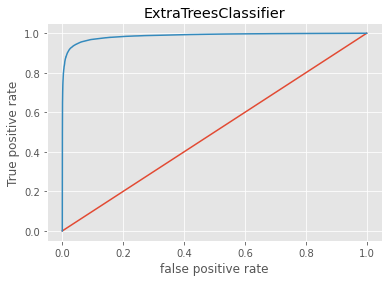

roc_auc_score =  0.9868283243180014


In [54]:
# Make predictions with probabilities
y_probs = clf_et.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the fpr
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('ExtraTreesClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[34880  1194]
 [ 2463 33611]]


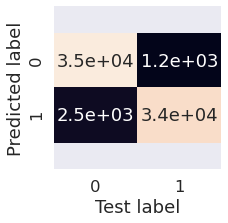

In [55]:
#Making the confusion matrix
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, predet),
                     annot=True,
                     cbar=False)
plt.xlabel("Test label")
plt.ylabel("Predicted label")
    
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    

print(confusion_matrix(y_test, predet))

In [58]:
# Saving predicted values in a csv file
df1=pd.DataFrame(predet)
df1.to_csv('Micro_Credit_submission.csv')

In [60]:
#Finding the most important features
clf_et.feature_importances_

array([0.05324472, 0.12287473, 0.06185129, 0.05635059, 0.00409905,
       0.0409518 , 0.04018981, 0.03123735, 0.11459603, 0.04854366,
       0.10135201, 0.03837462, 0.0564669 , 0.0028359 , 0.00027238,
       0.0707529 , 0.00424902, 0.02789517, 0.06143039, 0.01420824,
       0.00399292, 0.04423054])

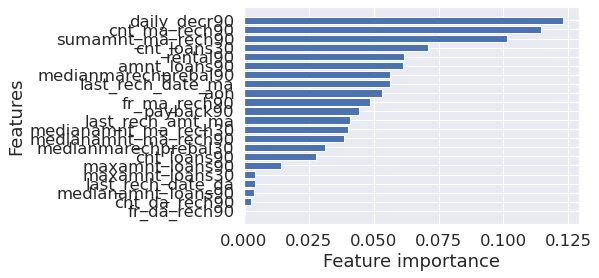

In [62]:
def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
plot_features(x_train.columns, clf_et.feature_importances_)

In [67]:
#lets save the model using joblib
import joblib
joblib.dump(clf_et,'Micro_Credit_submission.pkl')

['Micro_Credit_submission.pkl']

In [68]:
#read the file using joblib
et_from_joblib=joblib.load('Micro_Credit_submission.pkl')
joblib_y_preds = et_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 94.93%
Precision: 0.97
Recall: 0.93
F1 score: 0.95
log_loss :  1.7506966235449362


{'accuracy': 0.95, 'precision': 0.97, 'recall': 0.93, 'f1': 0.95}